In [1]:
%%capture
%run ./Part2_Find_a_Solution_Set_using_Multi_objective_Optimization.ipynb

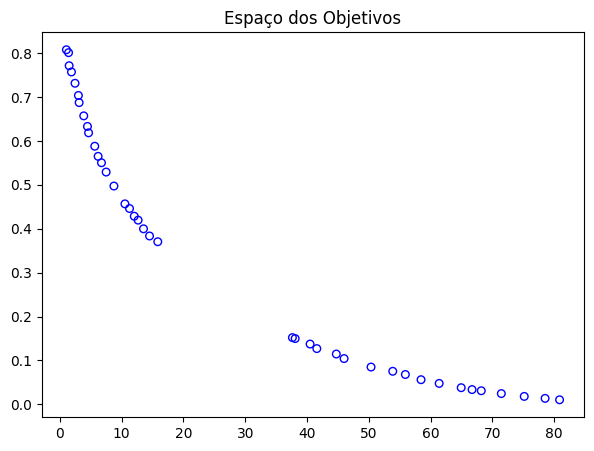

In [6]:
F = res.F        #obtendo as soluções da otimização

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Espaço dos Objetivos")
plt.show()

In [7]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [1.0489173777865646, 80.89502723066575]
Scale f2: [0.010477421848178244, 0.8077138875173443]


In [11]:
approx_ideal = F.min(axis=0)    #melhor valor possível para cada objetivo
approx_nadir = F.max(axis=0)    #pior valor observado para cada objetivo

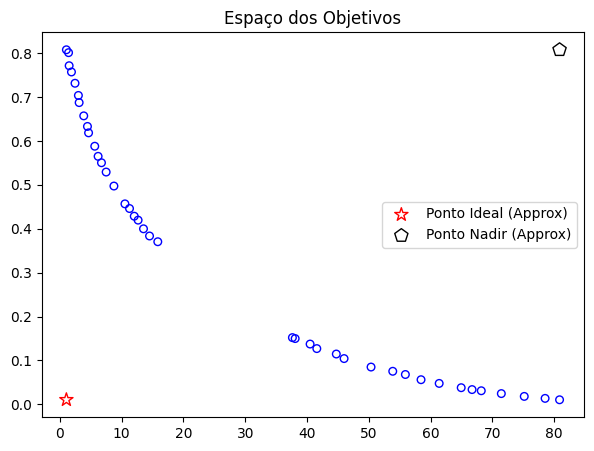

In [13]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ponto Ideal (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Ponto Nadir (Approx)")
plt.title("Espaço dos Objetivos")
plt.legend()
plt.show()

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


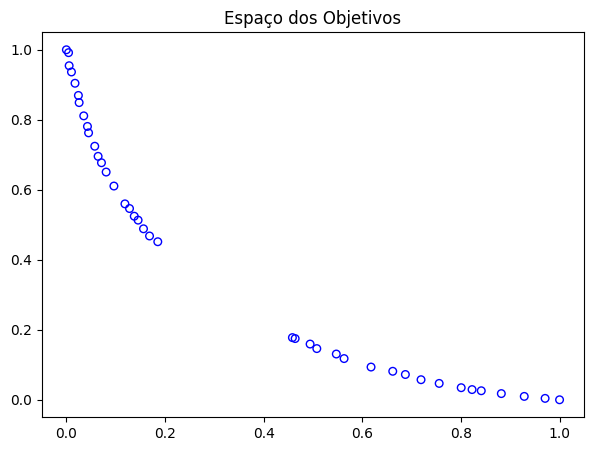

In [18]:
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)     #normalizando as soluções

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Espaço dos Objetivos")
plt.show()

In [15]:
weights = np.array([0.2, 0.8])  #preferimos mais o segundo objetivo


In [16]:
from pymoo.decomposition.asf import ASF

decomp = ASF()  #criamos o método de decisão

In [17]:
i = decomp.do(nF, 1/weights).argmin()   #calculamos o ASF para todas as soluções e escolhemos a melhor (mínima)

Melhor Solução com ASF: 
Indice i = 7
Valores de F = [6.14041461e+01 4.77629601e-02]


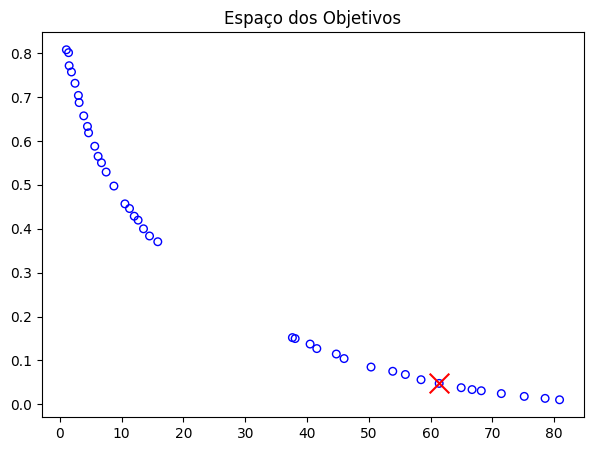

In [25]:
print("Melhor Solução com ASF: \nIndice i = %s\nValores de F = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Espaço dos Objetivos")
plt.show()

In [22]:
from pymoo.mcdm.pseudo_weights import PseudoWeights

i = PseudoWeights(weights).do(nF)   #aplicamos Pseudo-Weights e escolhemos a melhor solução

Melhor Solução com Pseudo-Weights: 
Indice i = 7
Valores de F = [6.14041461e+01 4.77629601e-02]


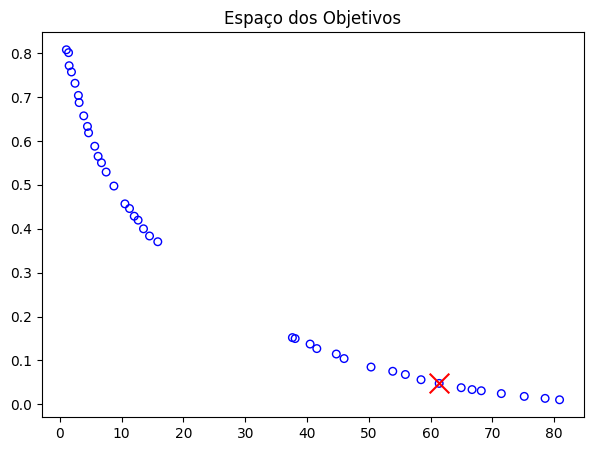

In [24]:
print("Melhor Solução com Pseudo-Weights: \nIndice i = %s\nValores de F = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Espaço dos Objetivos")
plt.show()